<a href="https://colab.research.google.com/github/sharan-88/ALL_RAG_IN_ONE/blob/main/Human_in_the_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install langgraph

In [19]:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [20]:
class State(TypedDict):
  input:str
  step_1:str
  step_2:str
  step_3:str


In [33]:
# HUMAN IN THE LOOP IMPLEMENTATION
from langgraph.types import interrupt,Command

In [34]:
def step_01(State):
  print("step 1 is executing")
  return {"step_1":"this is updated successfully"}
def step_02(State):
  print("step o2 is executing")
  value =interrupt(
      "what should i replay in the step-02"
  )

  return {"step_2":f"this is the value suggested by user :) {value}"}
def step_03(State):
  print("step 3 is executing")
  return {"step_3":"this is updated successfully"}

In [35]:
workflow = StateGraph(State)
workflow.add_node("step_1",step_01)
workflow.add_node("step_2",step_02)
workflow.add_node("step_3",step_03)

workflow.add_edge("step_1","step_2")
workflow.add_edge("step_2","step_3")
workflow.add_edge(START,"step_1")
workflow.add_edge("step_3",END)

In [36]:
checkpointer = InMemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

In [37]:
config={
    "configurable":{
        "thread_id":"thread-01"
        }
    }
try:
  print("started executing the graph")
  graph.invoke({"input":"this is intial message passed  while invoking the graph"},config=config)
except:
  print("some worng -- interrupted")


started executing the graph
step 1 is executing
step o2 is executing


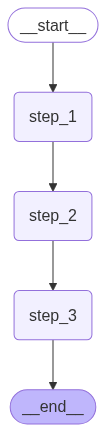

In [48]:
graph

In [41]:
 state =graph.get_state(config=config)

In [42]:
state

StateSnapshot(values={'input': 'this is intial message passed  while invoking the graph', 'step_1': 'this is updated successfully'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e82-bc4f-6629-8001-728cca4a5f65'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-05T10:37:22.916482+00:00', parent_config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e82-bc4c-6012-8000-1ec40bef5a08'}}, tasks=(PregelTask(id='03a90bd5-48eb-f333-6985-f1388500d2a8', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(Interrupt(value='what should i replay in the step-02', id='0d6ad02fc7c51603ac34d1c9c1854e3d'),), state=None, result=None),), interrupts=(Interrupt(value='what should i replay in the step-02', id='0d6ad02fc7c51603ac34d1c9c1854e3d'),))

In [44]:
state.tasks[0].interrupts

(Interrupt(value='what should i replay in the step-02', id='0d6ad02fc7c51603ac34d1c9c1854e3d'),)

In [46]:
graph.invoke(Command(resume="say that i am  bussy i have home work to do "),config=config)

step o2 is executing
step 3 is executing


{'input': 'this is intial message passed  while invoking the graph',
 'step_1': 'this is updated successfully',
 'step_2': 'this is the value suggested by user :) say that i am  bussy i have home work to do ',
 'step_3': 'this is updated successfully'}

In [47]:
graph.get_state(config=config)

StateSnapshot(values={'input': 'this is intial message passed  while invoking the graph', 'step_1': 'this is updated successfully', 'step_2': 'this is the value suggested by user :) say that i am  bussy i have home work to do ', 'step_3': 'this is updated successfully'}, next=(), config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e8d-a80b-684c-8003-dcab1f1bd291'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-08-05T10:42:16.070533+00:00', parent_config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e8d-a806-6fa1-8002-7cf84c40b4da'}}, tasks=(), interrupts=())

In [31]:
 list(graph.get_state_history(config=config))

[StateSnapshot(values={'input': 'this is intial message passed  while invoking the graph', 'step_1': 'this is updated successfully'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e7a-b6fa-6fe8-8001-78ec7c3b1f72'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-08-05T10:33:47.609264+00:00', parent_config={'configurable': {'thread_id': 'thread-01', 'checkpoint_ns': '', 'checkpoint_id': '1f071e7a-b6f7-6e7c-8000-52184287ddff'}}, tasks=(PregelTask(id='42b304d8-8646-48d3-dac7-410a46b429e5', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(Interrupt(value='what should i replay in the step-02', id='d61bd3964c7fd61f3716c59196481a98'),), state=None, result=None),), interrupts=(Interrupt(value='what should i replay in the step-02', id='d61bd3964c7fd61f3716c59196481a98'),)),
 StateSnapshot(values={'input': 'this is intial message passed  while invoking the graph'}, next=('step_1',)

In [29]:
# graph.invoke(None,config=config)

update state
